# 주제: 가상자산의 가격이 금리, 투자심리, 물가와 연관이 있을까


In [1]:
import pandas as pd
import numpy as np

In [2]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [3]:
import yfinance as yf
from datetime import datetime, timedelta

startdate='2015-01-02'
enddate='2024-01-01'
# S&P500 지수
snp=yf.download('^GSPC', startdate, enddate, auto_adjust=True)
# 비트코인
btc=yf.download('BTC-USD', startdate, enddate, auto_adjust=True)
# 금리
ir=yf.download('^TNX', startdate, enddate, auto_adjust=True)
# 투자 심리
vix=yf.download('^VIX', startdate, enddate, auto_adjust=True)
# 물가
cpi = pd.read_csv('./datasets/CPILFESL.csv')

dominance = pd.read_csv('./datasets/bitcoin-dominance_(Coinmarketcap).csv')

coinmarketcap = pd.read_csv('./datasets/market-cap(Coinmarketcap).csv')

covid = pd.read_csv('./datasets/worldometer_data.csv')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


### 데이터 전처리

#### 시간 데이터 정리

In [4]:
cpi_df = cpi[(cpi['DATE'] >= '2015-01-01') & (cpi['DATE'] <= '2023-12-31')]
cpi_df

,DATE,CPILFESL
696,2015-01-01,239.811
697,2015-02-01,240.172
698,2015-03-01,240.755
699,2015-04-01,241.346
700,2015-05-01,241.688
...,...,...
799,2023-08-01,309.656
800,2023-09-01,310.644
801,2023-10-01,311.390
802,2023-11-01,312.349


In [5]:
dominance['DateTime'] = pd.to_datetime(dominance['DateTime'])
dominance['DateTime'] = dominance['DateTime'].dt.strftime('%Y-%m-%d')
dominance_df = dominance[(dominance['DateTime'] >= '2015-01-01') & (dominance['DateTime'] <= '2023-12-31')]
dominance_df


,DateTime,BTC,ETH,USDT,BNB,SOL,기타
87,2015-01-04,3.847140e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.022340e+09
88,2015-01-11,3.764965e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.104554e+08
89,2015-01-18,2.747723e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.415470e+08
90,2015-01-25,3.403309e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.121010e+08
91,2015-02-01,2.989457e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.041131e+08
...,...,...,...,...,...,...,...
552,2023-12-03,7.720445e+11,2.604175e+11,8.956680e+10,3.478286e+10,2.707359e+10,3.011843e+11
553,2023-12-10,8.555655e+11,2.814830e+11,9.036760e+10,3.607257e+10,3.078523e+10,3.340668e+11
554,2023-12-17,8.266443e+11,2.676788e+11,9.082720e+10,3.706691e+10,3.141917e+10,3.460489e+11
555,2023-12-24,8.561530e+11,2.775795e+11,9.124217e+10,4.116633e+10,4.604804e+10,3.640213e+11


In [6]:
coinmarketcap['DateTime'] = pd.to_datetime(coinmarketcap['DateTime'])
coinmarketcap['DateTime'] = coinmarketcap['DateTime'].dt.strftime('%Y-%m-%d')
coinmarketcap_df = coinmarketcap[(coinmarketcap['DateTime'] >= '2015-01-01') & (coinmarketcap['DateTime'] <= '2023-12-31')]
coinmarketcap_df
coinmarketcap_df

,DateTime,Market cap
306,2015-01-01,5.604920e+09
307,2015-01-03,5.472630e+09
308,2015-01-05,4.544220e+09
309,2015-01-07,4.911450e+09
310,2015-01-09,4.856070e+09
...,...,...
1944,2023-12-23,1.676336e+12
1945,2023-12-25,1.656583e+12
1946,2023-12-27,1.654251e+12
1947,2023-12-29,1.670124e+12


In [7]:
cpi_df.columns  =['Date', 'Cpi']
cpi_df = cpi_df.reset_index()
cpi_df = cpi_df.drop(columns='index', axis=1)
cpi_df

,Date,Cpi
0,2015-01-01,239.811
1,2015-02-01,240.172
2,2015-03-01,240.755
3,2015-04-01,241.346
4,2015-05-01,241.688
...,...,...
103,2023-08-01,309.656
104,2023-09-01,310.644
105,2023-10-01,311.390
106,2023-11-01,312.349


In [8]:
dominance_df.columns  =['Date','BTC','ETH','USDT','BNB','SOL','etc']
dominance_df = dominance_df.reset_index()
dominance_df = dominance_df.drop(columns='index', axis=1)
dominance_df

,Date,BTC,ETH,USDT,BNB,SOL,etc
0,2015-01-04,3.847140e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.022340e+09
1,2015-01-11,3.764965e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.104554e+08
2,2015-01-18,2.747723e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.415470e+08
3,2015-01-25,3.403309e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.121010e+08
4,2015-02-01,2.989457e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.041131e+08
...,...,...,...,...,...,...,...
465,2023-12-03,7.720445e+11,2.604175e+11,8.956680e+10,3.478286e+10,2.707359e+10,3.011843e+11
466,2023-12-10,8.555655e+11,2.814830e+11,9.036760e+10,3.607257e+10,3.078523e+10,3.340668e+11
467,2023-12-17,8.266443e+11,2.676788e+11,9.082720e+10,3.706691e+10,3.141917e+10,3.460489e+11
468,2023-12-24,8.561530e+11,2.775795e+11,9.124217e+10,4.116633e+10,4.604804e+10,3.640213e+11


In [9]:
coinmarketcap_df.columns  =['Date', 'Marketcap']
coinmarketcap_df = coinmarketcap_df.reset_index()
coinmarketcap_df = coinmarketcap_df.drop(columns='index', axis=1)
coinmarketcap_df

,Date,Marketcap
0,2015-01-01,5.604920e+09
1,2015-01-03,5.472630e+09
2,2015-01-05,4.544220e+09
3,2015-01-07,4.911450e+09
4,2015-01-09,4.856070e+09
...,...,...
1638,2023-12-23,1.676336e+12
1639,2023-12-25,1.656583e+12
1640,2023-12-27,1.654251e+12
1641,2023-12-29,1.670124e+12


In [10]:
snp_df = snp.reset_index()
display(snp_df)
btc_df = btc.reset_index()
display(btc_df)
ir_df = ir.reset_index()
display(ir_df)
vix_df = vix.reset_index()
display(vix_df)
display(cpi_df)
display(dominance_df)
display(coinmarketcap_df)

,Date,Open,High,Low,Close,Volume
0,2015-01-02,2058.899902,2072.360107,2046.040039,2058.199951,2708700000
1,2015-01-05,2054.439941,2054.439941,2017.339966,2020.579956,3799120000
2,2015-01-06,2022.150024,2030.250000,1992.439941,2002.609985,4460110000
3,2015-01-07,2005.550049,2029.609985,2005.550049,2025.900024,3805480000
4,2015-01-08,2030.609985,2064.080078,2030.609985,2062.139893,3934010000
...,...,...,...,...,...,...
2259,2023-12-22,4753.919922,4772.939941,4736.770020,4754.629883,3046770000
2260,2023-12-26,4758.859863,4784.720215,4758.450195,4774.750000,2513910000
2261,2023-12-27,4773.450195,4785.390137,4768.899902,4781.580078,2748450000
2262,2023-12-28,4786.439941,4793.299805,4780.979980,4783.350098,2698860000


,Date,Open,High,Low,Close,Volume
0,2015-01-02,314.079010,315.838989,313.565002,315.032013,7860650
1,2015-01-03,314.846008,315.149994,281.082001,281.082001,33054400
2,2015-01-04,281.145996,287.230011,257.612000,264.195007,55629100
3,2015-01-05,265.084015,278.341003,265.084015,274.473999,43962800
4,2015-01-06,274.610992,287.553009,272.696014,286.188995,23245700
...,...,...,...,...,...,...
3281,2023-12-27,42518.468750,43683.160156,42167.582031,43442.855469,25260941032
3282,2023-12-28,43468.199219,43804.781250,42318.550781,42627.855469,22992093014
3283,2023-12-29,42614.644531,43124.324219,41424.062500,42099.402344,26000021055
3284,2023-12-30,42091.753906,42584.125000,41556.226562,42156.902344,16013925945


,Date,Open,High,Low,Close,Volume
0,2015-01-02,2.197,2.213,2.102,2.123,0
1,2015-01-05,2.102,2.109,2.037,2.039,0
2,2015-01-06,1.968,1.997,1.889,1.963,0
3,2015-01-07,1.975,2.008,1.938,1.954,0
4,2015-01-08,2.004,2.030,1.988,2.016,0
...,...,...,...,...,...,...
2257,2023-12-22,3.852,3.919,3.849,3.901,0
2258,2023-12-26,3.908,3.908,3.882,3.886,0
2259,2023-12-27,3.852,3.852,3.785,3.789,0
2260,2023-12-28,3.818,3.861,3.800,3.850,0


,Date,Open,High,Low,Close,Volume
0,2015-01-02,17.760000,20.139999,17.049999,17.790001,0
1,2015-01-05,19.190001,21.290001,19.190001,19.920000,0
2,2015-01-06,20.330000,22.900000,19.520000,21.120001,0
3,2015-01-07,20.150000,20.719999,19.040001,19.309999,0
4,2015-01-08,17.930000,18.090000,16.990000,17.010000,0
...,...,...,...,...,...,...
2259,2023-12-22,13.720000,13.960000,13.000000,13.030000,0
2260,2023-12-26,13.770000,13.800000,12.960000,12.990000,0
2261,2023-12-27,13.020000,13.040000,12.370000,12.430000,0
2262,2023-12-28,12.440000,12.650000,12.380000,12.470000,0


,Date,Cpi
0,2015-01-01,239.811
1,2015-02-01,240.172
2,2015-03-01,240.755
3,2015-04-01,241.346
4,2015-05-01,241.688
...,...,...
103,2023-08-01,309.656
104,2023-09-01,310.644
105,2023-10-01,311.390
106,2023-11-01,312.349


,Date,BTC,ETH,USDT,BNB,SOL,etc
0,2015-01-04,3.847140e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.022340e+09
1,2015-01-11,3.764965e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.104554e+08
2,2015-01-18,2.747723e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.415470e+08
3,2015-01-25,3.403309e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.121010e+08
4,2015-02-01,2.989457e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.041131e+08
...,...,...,...,...,...,...,...
465,2023-12-03,7.720445e+11,2.604175e+11,8.956680e+10,3.478286e+10,2.707359e+10,3.011843e+11
466,2023-12-10,8.555655e+11,2.814830e+11,9.036760e+10,3.607257e+10,3.078523e+10,3.340668e+11
467,2023-12-17,8.266443e+11,2.676788e+11,9.082720e+10,3.706691e+10,3.141917e+10,3.460489e+11
468,2023-12-24,8.561530e+11,2.775795e+11,9.124217e+10,4.116633e+10,4.604804e+10,3.640213e+11


,Date,Marketcap
0,2015-01-01,5.604920e+09
1,2015-01-03,5.472630e+09
2,2015-01-05,4.544220e+09
3,2015-01-07,4.911450e+09
4,2015-01-09,4.856070e+09
...,...,...
1638,2023-12-23,1.676336e+12
1639,2023-12-25,1.656583e+12
1640,2023-12-27,1.654251e+12
1641,2023-12-29,1.670124e+12


#### 결측치 확인

In [11]:
display(snp_df.info())
display(btc_df.info())
display(ir_df.info())
display(vix_df.info())
display(cpi_df.info())
display(dominance_df.info())
display(coinmarketcap_df.info())
display(covid.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2264 entries, 0 to 2263
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2264 non-null   datetime64[ns]
 1   Open    2264 non-null   float64       
 2   High    2264 non-null   float64       
 3   Low     2264 non-null   float64       
 4   Close   2264 non-null   float64       
 5   Volume  2264 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 106.3 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3286 entries, 0 to 3285
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3286 non-null   datetime64[ns]
 1   Open    3286 non-null   float64       
 2   High    3286 non-null   float64       
 3   Low     3286 non-null   float64       
 4   Close   3286 non-null   float64       
 5   Volume  3286 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 154.2 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2262 entries, 0 to 2261
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2262 non-null   datetime64[ns]
 1   Open    2262 non-null   float64       
 2   High    2262 non-null   float64       
 3   Low     2262 non-null   float64       
 4   Close   2262 non-null   float64       
 5   Volume  2262 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 106.2 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2264 entries, 0 to 2263
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2264 non-null   datetime64[ns]
 1   Open    2264 non-null   float64       
 2   High    2264 non-null   float64       
 3   Low     2264 non-null   float64       
 4   Close   2264 non-null   float64       
 5   Volume  2264 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 106.3 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    108 non-null    object 
 1   Cpi     108 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.8+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    470 non-null    object 
 1   BTC     470 non-null    float64
 2   ETH     470 non-null    float64
 3   USDT    470 non-null    float64
 4   BNB     470 non-null    float64
 5   SOL     470 non-null    float64
 6   etc     470 non-null    float64
dtypes: float64(6), object(1)
memory usage: 25.8+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1643 entries, 0 to 1642
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1643 non-null   object 
 1   Marketcap  1643 non-null   float64
dtypes: float64(1), object(1)
memory usage: 25.8+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country/Region    209 non-null    object 
 1   Continent         208 non-null    object 
 2   Population        208 non-null    float64
 3   TotalCases        209 non-null    int64  
 4   NewCases          4 non-null      float64
 5   TotalDeaths       188 non-null    float64
 6   NewDeaths         3 non-null      float64
 7   TotalRecovered    205 non-null    float64
 8   NewRecovered      3 non-null      float64
 9   ActiveCases       205 non-null    float64
 10  Serious,Critical  122 non-null    float64
 11  Tot Cases/1M pop  208 non-null    float64
 12  Deaths/1M pop     187 non-null    float64
 13  TotalTests        191 non-null    float64
 14  Tests/1M pop      191 non-null    float64
 15  WHO Region        184 non-null    object 
dtypes: float64(12), int64(1), object(3)
memory u

None

In [12]:
covid.isna().sum()

Country/Region        0
Continent             1
Population            1
TotalCases            0
NewCases            205
TotalDeaths          21
NewDeaths           206
TotalRecovered        4
NewRecovered        206
ActiveCases           4
Serious,Critical     87
Tot Cases/1M pop      1
Deaths/1M pop        22
TotalTests           18
Tests/1M pop         18
WHO Region           25
dtype: int64

In [13]:
covid_df = covid.drop(columns=['NewDeaths', 'Deaths/1M pop', 'NewCases' ,'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'TotalTests', 'Tests/1M pop', 'WHO Region'], axis=1)
covid_df

,Country/Region,Continent,Population,TotalCases,TotalDeaths
0,USA,North America,3.311981e+08,5032179,162804.0
1,Brazil,South America,2.127107e+08,2917562,98644.0
2,India,Asia,1.381345e+09,2025409,41638.0
3,Russia,Europe,1.459409e+08,871894,14606.0
4,South Africa,Africa,5.938157e+07,538184,9604.0
...,...,...,...,...,...
204,Montserrat,North America,4.992000e+03,13,1.0
205,Caribbean Netherlands,North America,2.624700e+04,13,NaN
206,Falkland Islands,South America,3.489000e+03,13,NaN
207,Vatican City,Europe,8.010000e+02,12,NaN


In [14]:
covid_df.fillna(1, inplace=True)
display(covid_df)

,Country/Region,Continent,Population,TotalCases,TotalDeaths
0,USA,North America,3.311981e+08,5032179,162804.0
1,Brazil,South America,2.127107e+08,2917562,98644.0
2,India,Asia,1.381345e+09,2025409,41638.0
3,Russia,Europe,1.459409e+08,871894,14606.0
4,South Africa,Africa,5.938157e+07,538184,9604.0
...,...,...,...,...,...
204,Montserrat,North America,4.992000e+03,13,1.0
205,Caribbean Netherlands,North America,2.624700e+04,13,1.0
206,Falkland Islands,South America,3.489000e+03,13,1.0
207,Vatican City,Europe,8.010000e+02,12,1.0


In [15]:
covid_df = covid_df[covid_df['Continent'] != 1]
covid_df

,Country/Region,Continent,Population,TotalCases,TotalDeaths
0,USA,North America,3.311981e+08,5032179,162804.0
1,Brazil,South America,2.127107e+08,2917562,98644.0
2,India,Asia,1.381345e+09,2025409,41638.0
3,Russia,Europe,1.459409e+08,871894,14606.0
4,South Africa,Africa,5.938157e+07,538184,9604.0
...,...,...,...,...,...
204,Montserrat,North America,4.992000e+03,13,1.0
205,Caribbean Netherlands,North America,2.624700e+04,13,1.0
206,Falkland Islands,South America,3.489000e+03,13,1.0
207,Vatican City,Europe,8.010000e+02,12,1.0


### 정규화

In [16]:
cpi_df['Date'] = pd.to_datetime(cpi_df['Date'])
btc_df['Date'] = pd.to_datetime(btc_df['Date'])
ir_df['Date'] = pd.to_datetime(ir_df['Date'])
snp_df['Date'] = pd.to_datetime(snp_df['Date'])
vix_df['Date'] = pd.to_datetime(vix_df['Date'])
dominance_df['Date'] = pd.to_datetime(dominance_df['Date'])
coinmarketcap_df['Date'] = pd.to_datetime(coinmarketcap_df['Date'])


In [17]:
from sklearn.preprocessing import MinMaxScaler

btc_scale = MinMaxScaler()
btc_df[['Open', 'High', 'Low', 'Close', 'Volume']] = btc_scale.fit_transform(btc_df[['Open', 'High', 'Low', 'Close', 'Volume']])
display(btc_df)

cpi_scale = MinMaxScaler()
cpi_df[['Cpi']] = cpi_scale.fit_transform(cpi_df[['Cpi']])
display(cpi_df)

ir_scale = MinMaxScaler()
ir_df[['Open', 'High', 'Low', 'Close', 'Volume']] = ir_scale.fit_transform(ir_df[['Open', 'High', 'Low', 'Close', 'Volume']])
display(ir_df)

snp_scale = MinMaxScaler()
snp_df[['Open', 'High', 'Low', 'Close', 'Volume']] = snp_scale.fit_transform(snp_df[['Open', 'High', 'Low', 'Close', 'Volume']])
display(snp_df)

vix_scale = MinMaxScaler()
vix_df[['Open', 'High', 'Low', 'Close', 'Volume']] = vix_scale.fit_transform(vix_df[['Open', 'High', 'Low', 'Close', 'Volume']])
vix_df['Close'] = 1 - vix_df['Close']
display(vix_df)


dominance_df.iloc[:, 1:] = dominance_df.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
display(dominance_df)
coinmarketcap_scale = MinMaxScaler()
coinmarketcap_df[['Marketcap']] = coinmarketcap_scale.fit_transform(coinmarketcap_df[['Marketcap']])
coinmarketcap_df.iloc[:, 1:] = coinmarketcap_df.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
display(coinmarketcap_df)

,Date,Open,High,Low,Close,Volume
0,2015-01-02,0.002036,0.001518,0.002146,0.002032,0.000000
1,2015-01-03,0.002048,0.001508,0.001655,0.001528,0.000072
2,2015-01-04,0.001547,0.001101,0.001300,0.001278,0.000136
3,2015-01-05,0.001309,0.000971,0.001413,0.001430,0.000103
4,2015-01-06,0.001450,0.001106,0.001528,0.001604,0.000044
...,...,...,...,...,...,...
3281,2023-12-27,0.628467,0.633899,0.634281,0.642018,0.071954
3282,2023-12-28,0.642563,0.635672,0.636561,0.629924,0.065490
3283,2023-12-29,0.629894,0.625750,0.623051,0.622082,0.074060
3284,2023-12-30,0.622133,0.617872,0.625047,0.622935,0.045607


,Date,Cpi
0,2015-01-01,0.000000
1,2015-02-01,0.004918
2,2015-03-01,0.012861
3,2015-04-01,0.020913
4,2015-05-01,0.025573
...,...,...
103,2023-08-01,0.951593
104,2023-09-01,0.965054
105,2023-10-01,0.975217
106,2023-11-01,0.988283


,Date,Open,High,Low,Close,Volume
0,2015-01-02,0.379570,0.375645,0.379004,0.361773,0.0
1,2015-01-05,0.358520,0.352321,0.364546,0.343061,0.0
2,2015-01-06,0.328828,0.327203,0.331628,0.326131,0.0
3,2015-01-07,0.330379,0.329670,0.342527,0.324126,0.0
4,2015-01-08,0.336805,0.334604,0.353648,0.337937,0.0
...,...,...,...,...,...,...
2257,2023-12-22,0.746288,0.758242,0.767571,0.757853,0.0
2258,2023-12-26,0.758697,0.755775,0.774911,0.754511,0.0
2259,2023-12-27,0.746288,0.743216,0.753336,0.732903,0.0
2260,2023-12-28,0.738755,0.745234,0.756673,0.746491,0.0


,Date,Open,High,Low,Close,Volume
0,2015-01-02,0.075898,0.075837,0.079418,0.077210,0.162693
1,2015-01-05,0.074396,0.069807,0.069757,0.064533,0.288317
2,2015-01-06,0.063528,0.061667,0.061376,0.058477,0.364468
3,2015-01-07,0.057941,0.061451,0.065789,0.066326,0.289050
4,2015-01-08,0.066376,0.073051,0.074224,0.078538,0.303857
...,...,...,...,...,...,...
2259,2023-12-22,0.982973,0.984628,0.985119,0.985870,0.201641
2260,2023-12-26,0.984635,0.988592,0.992416,0.992650,0.140251
2261,2023-12-27,0.989546,0.988818,0.995934,0.994952,0.167272
2262,2023-12-28,0.993918,0.991479,1.000000,0.995548,0.161559


,Date,Open,High,Low,Close,Volume
0,2015-01-02,0.118757,0.142201,0.137356,0.882393,0.0
1,2015-01-05,0.138165,0.157300,0.171979,0.853433,0.0
2,2015-01-06,0.153637,0.178440,0.177318,0.837118,0.0
3,2015-01-07,0.151194,0.149816,0.169552,0.861727,0.0
4,2015-01-08,0.121064,0.115284,0.136386,0.892998,0.0
...,...,...,...,...,...,...
2259,2023-12-22,0.063925,0.061056,0.071833,0.947111,0.0
2260,2023-12-26,0.064604,0.058955,0.071186,0.947655,0.0
2261,2023-12-27,0.054425,0.048976,0.061641,0.955269,0.0
2262,2023-12-28,0.046553,0.043855,0.061802,0.954725,0.0


,Date,BTC,ETH,USDT,BNB,SOL,etc
0,2015-01-04,3.847140e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.022340e+09
1,2015-01-11,3.764965e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.104554e+08
2,2015-01-18,2.747723e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.415470e+08
3,2015-01-25,3.403309e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.121010e+08
4,2015-02-01,2.989457e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.041131e+08
...,...,...,...,...,...,...,...
465,2023-12-03,7.720445e+11,2.604175e+11,8.956680e+10,3.478286e+10,2.707359e+10,3.011843e+11
466,2023-12-10,8.555655e+11,2.814830e+11,9.036760e+10,3.607257e+10,3.078523e+10,3.340668e+11
467,2023-12-17,8.266443e+11,2.676788e+11,9.082720e+10,3.706691e+10,3.141917e+10,3.460489e+11
468,2023-12-24,8.561530e+11,2.775795e+11,9.124217e+10,4.116633e+10,4.604804e+10,3.640213e+11


,Date,Marketcap
0,2015-01-01,0.000858
1,2015-01-03,0.000813
2,2015-01-05,0.000494
3,2015-01-07,0.000620
4,2015-01-09,0.000601
...,...,...
1638,2023-12-23,0.573691
1639,2023-12-25,0.566919
1640,2023-12-27,0.566119
1641,2023-12-29,0.571561


### 범위 나누기

In [18]:
l1, l2, l3, l4 = np.percentile(vix_df['Close'], [20, 40, 60, 80])
print(l1, l2, l3, l4)

0.8089191042639847 0.8716519468239515 0.9167641093582651 0.9495581246456056


In [19]:
def get_level(x):
    if x <= l1:
        return 5
    if x <= l2:
        return 4
    if x <= l3:
        return 3
    if x <= l4:
        return 2
    return 1

In [20]:
vix_df['Level'] = vix_df['Close'].apply(get_level)
vix_df

,Date,Open,High,Low,Close,Volume,Level
0,2015-01-02,0.118757,0.142201,0.137356,0.882393,0.0,3
1,2015-01-05,0.138165,0.157300,0.171979,0.853433,0.0,4
2,2015-01-06,0.153637,0.178440,0.177318,0.837118,0.0,4
3,2015-01-07,0.151194,0.149816,0.169552,0.861727,0.0,4
4,2015-01-08,0.121064,0.115284,0.136386,0.892998,0.0,3
...,...,...,...,...,...,...,...
2259,2023-12-22,0.063925,0.061056,0.071833,0.947111,0.0,2
2260,2023-12-26,0.064604,0.058955,0.071186,0.947655,0.0,2
2261,2023-12-27,0.054425,0.048976,0.061641,0.955269,0.0,1
2262,2023-12-28,0.046553,0.043855,0.061802,0.954725,0.0,1


In [21]:
vix_df['Level'] = vix_df['Level'].replace([5, 4, 3, 2, 1], 
                                                ['Extreme Fear' ,'Fear' ,'Neutral', 'Greed' ,'Extreme Greed'])
vix_df

,Date,Open,High,Low,Close,Volume,Level
0,2015-01-02,0.118757,0.142201,0.137356,0.882393,0.0,Neutral
1,2015-01-05,0.138165,0.157300,0.171979,0.853433,0.0,Fear
2,2015-01-06,0.153637,0.178440,0.177318,0.837118,0.0,Fear
3,2015-01-07,0.151194,0.149816,0.169552,0.861727,0.0,Fear
4,2015-01-08,0.121064,0.115284,0.136386,0.892998,0.0,Neutral
...,...,...,...,...,...,...,...
2259,2023-12-22,0.063925,0.061056,0.071833,0.947111,0.0,Greed
2260,2023-12-26,0.064604,0.058955,0.071186,0.947655,0.0,Greed
2261,2023-12-27,0.054425,0.048976,0.061641,0.955269,0.0,Extreme Greed
2262,2023-12-28,0.046553,0.043855,0.061802,0.954725,0.0,Extreme Greed


## 가상자산의 가격이 금리, 투자심리, 물가와 연관이 있을까

### 1. S&P500과 비트코인의 가격을 기준으로 한 데이터 시각화
- 주식과 가상자산이 비슷한 움직임을 보인다면 금리와 투자심리, 물가의 영향을 잘 받는 주식과 같이 영향을 받을것이다.

### ❓ 가설
- 금리와 물가의 영향을 받는 주식은 가상자산과 같은 자산 카테고리에 포함되어있고 거래방식 개념 및 거래 방식 또한 주식과 굉장히 유사하기 때문에 주식과 가상 자산은 유사한 가격 흐름을 보여줄 것이다.


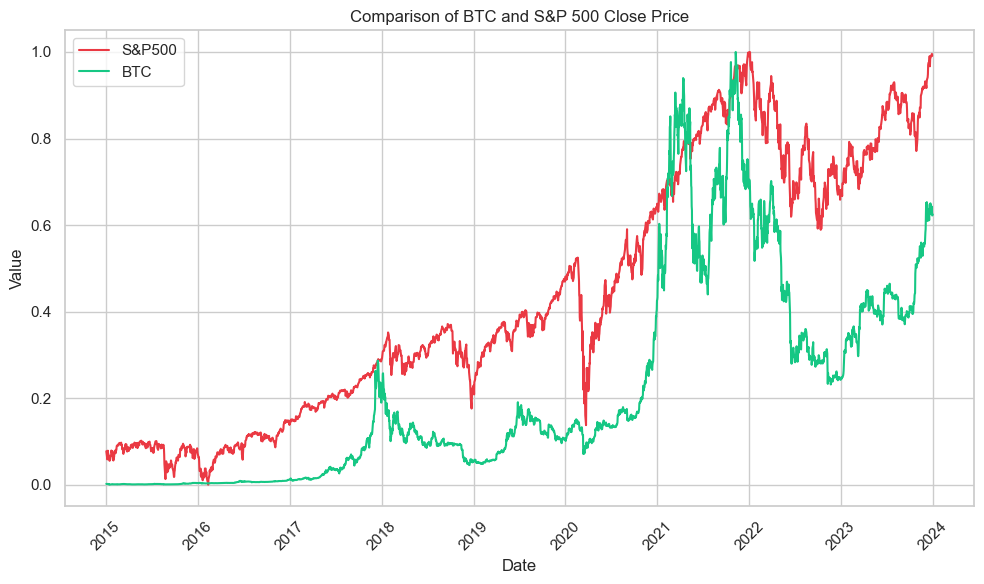

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid', font_scale=1) 
sns.lineplot(x=snp_df['Date'], y=snp_df['Close'], label='S&P500', color='#ea3943')
sns.lineplot(x=btc_df['Date'], y=btc_df['Close'], label='BTC', color='#16c784')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Comparison of BTC and S&P 500 Close Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### 📌 분석 결과
- 2015년 ~ 2024년까지 S&P500과 비트코인의 가격이 모두 우상향한다는 점이 같다.
- 비슷한 시기(2018년, 2021년)에 상승하고 비슷한 시기(2020년, 2022년)에 하락하는 모습을 보여준다.
- 2020년에 자산의 한 종류인 비트코인과 S&P500이 모두 큰 하락을 했으므로 경제적 타격이 컸을 것이다.
- 작은 파동들은 각 자산들의 특징에 따라 차이가 있을 수 있지만 큰 파동을 기준으로 본다면 S&P500과 비트코인의 연관성이 있을것이다.

### 2. S&P500, 비트코인, 금리, 물가를 기준으로 한 데이터 시각화
- 연관성이 있을것이라 예상되는 지표들을 한곳에 모아놓고 공통적인 특징을 찾아본다.

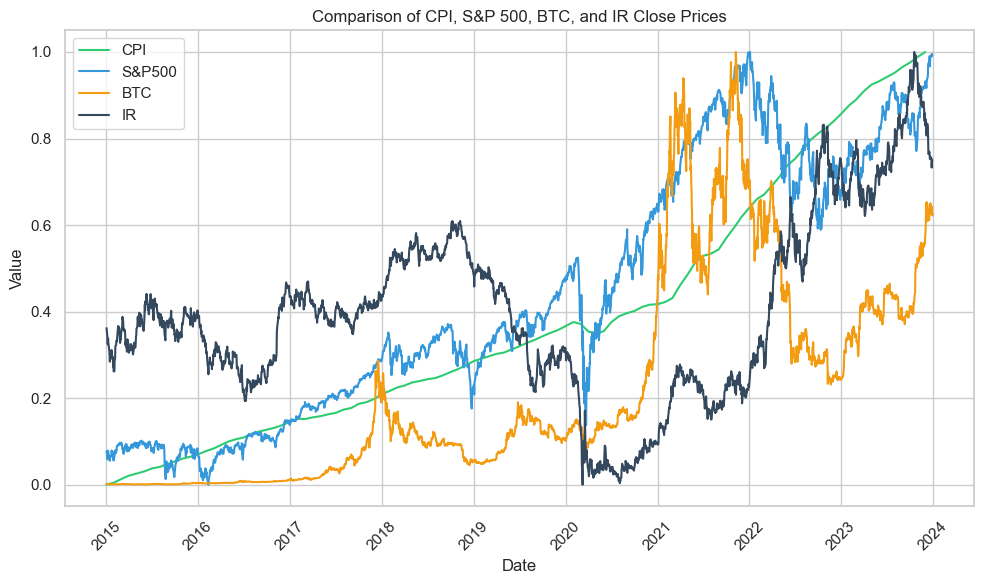

In [23]:
warnings.filterwarnings("ignore")

plt.figure(figsize=(10, 6))
sns.set(style='whitegrid', font_scale=1) 
sns.lineplot(x=cpi_df['Date'], y=cpi_df['Cpi'], label='CPI', color='#2ecc71') 
sns.lineplot(x=snp_df['Date'], y=snp_df['Close'], label='S&P500', color='#3498db')  
sns.lineplot(x=btc_df['Date'], y=btc_df['Close'], label='BTC', color='#f39c12')  
sns.lineplot(x=ir_df['Date'], y=ir_df['Close'], label='IR', color='#34495e') 
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Comparison of CPI, S&P 500, BTC, and IR Close Prices')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### 📌 분석 결과
- 2020년도에 S&P500과 비트코인 모두 큰 하락을 보여줬다.
- S&P500과 비트코인 모두 2020년 하락 이후 2022년까지 전고점을 갱신하는 큰 상승을 보여줬다.
- S&P500과 비트코인이 큰 하락을 하기전 금리가 큰폭으로 하락했다.
- S&P500과 비트코인이 큰 하락한 비슷한 시기에 물가가 일시적으로 하락했다.
- 반등을 시작으로 큰 상승까지 이어진 2022년도 까지 금리와 물가도 같이 상승했다.
- 금리와 S&P500, 비트코인, 물가는 서로 연관성이 있어보인다.

#### ❓ 의문점
- 금리하락과 물가하락은 투자 심리에 어떤 영향을 끼칠까

#### ❓ 가설
- 주식과 코인의 가격 폭락으로 투자심리가 위축되었을 것이다.
- 하지만 바로 반등을 하면서 위축되었던 투자심리가 오래가지 않았을 것이다.

### 3. VIX지수를 기준으로 한 데이터 시각화
- 투자심리를 나타내는 지수인 VIX지수를 시각화한다.

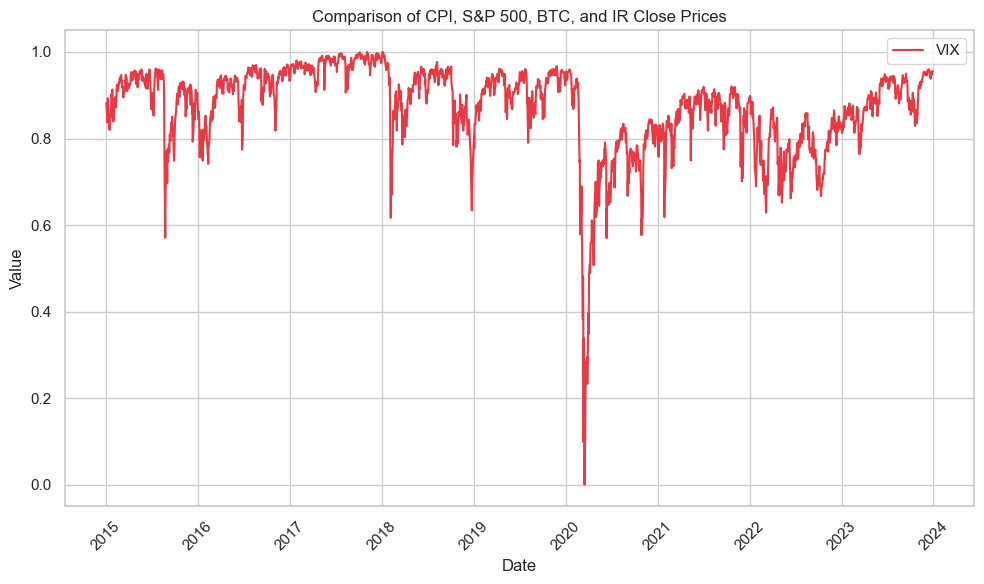

In [24]:
warnings.filterwarnings("ignore")

plt.figure(figsize=(10, 6))
sns.set(style='whitegrid', font_scale=1) 
sns.lineplot(x=vix_df['Date'], y=vix_df['Close'], label='VIX', color='#ea3943') 
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Comparison of CPI, S&P 500, BTC, and IR Close Prices')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### 📌 분석 결과
- VIX지수를 확인한 결과 2020년도에 실제로 투자 심리가 위축 되었다.
- 투자 심리가 반등했지만 전고점을 넘지 못하는 모습을 보여주고 있다.
- 2020년을 제외하면 대부분 0.6 ~ 1.0으로 고르게 분포되어있다.
- VIX지수를 5단계로 나누어 당시 투자자들의 심리가 어땠는지 직관적으로 분석해보아야 할거 같다

### 5. VIX지수를 기준으로 Lavel로 등급 나누어 한 데이터 시각화
- 투자심리를 나타내는 지수인 VIX지수를 5단계로 나누어 세분화 한뒤 각 년도마다 단계별 비율을 시각화한다.

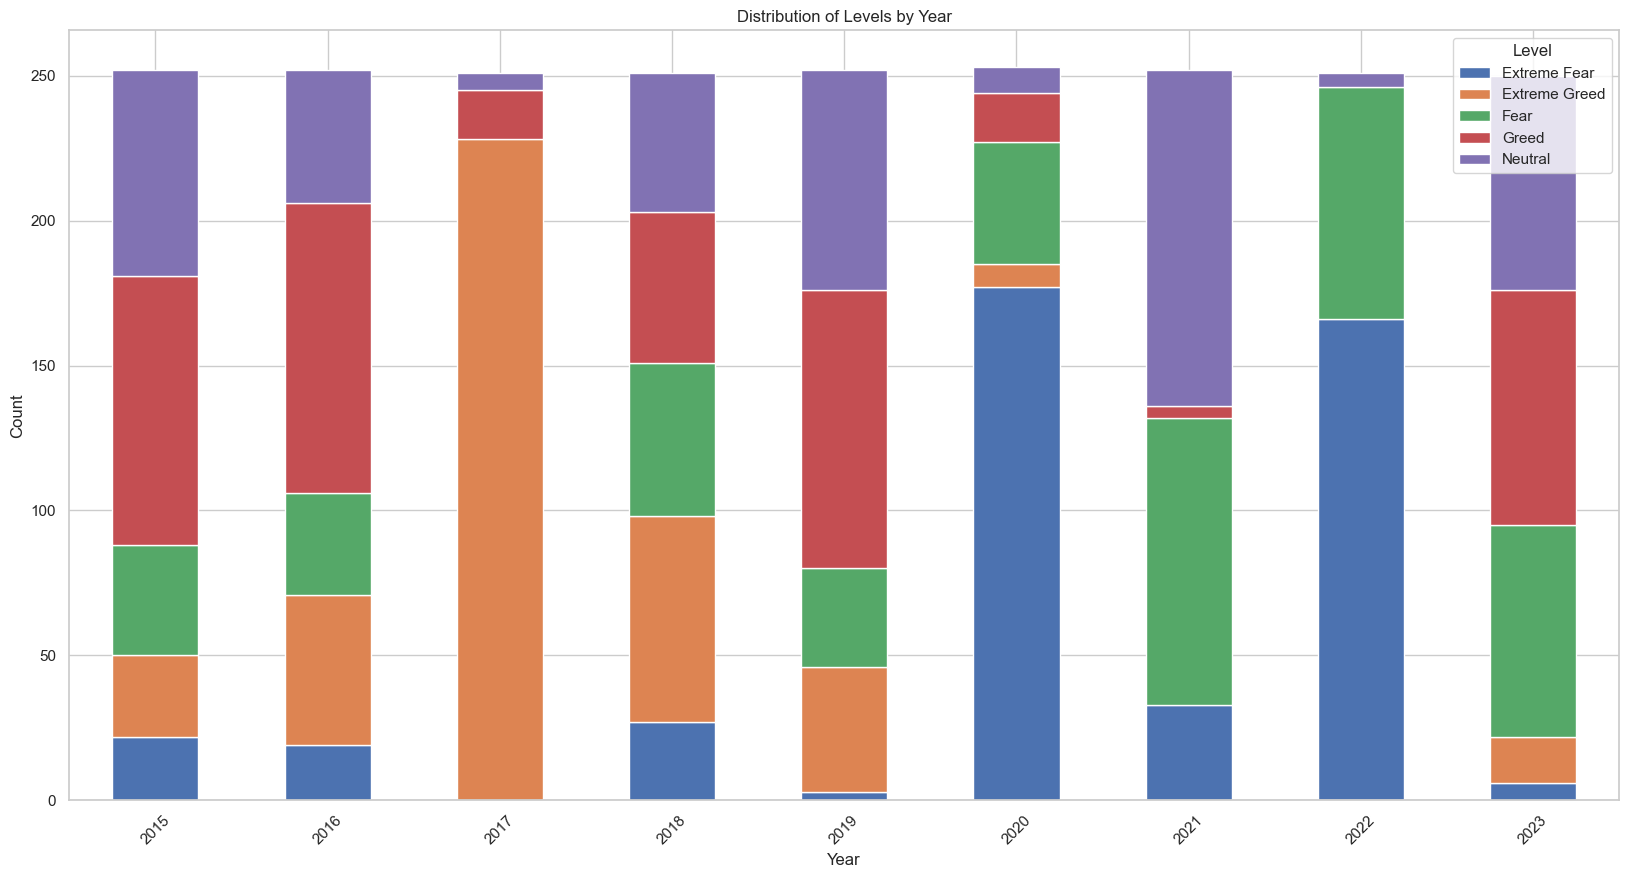

In [25]:
vix_df['Date'] = pd.to_datetime(vix_df['Date'])

vix_df['Year'] = vix_df['Date'].dt.year

yearly_level_counts = vix_df.groupby(['Year', 'Level']).size().unstack(fill_value=0)

yearly_level_counts.plot(kind='bar', stacked=True, figsize=(20, 10))
plt.title('Distribution of Levels by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Level')
plt.show()

#### 📌 분석 결과
- 큰 하락이 있었던 2020년 투자 심리가 Extreme Fear의 비중이 가장 많음으로 위축되었던것을 볼수 있다.
- 예상과 달리 Neutral 보다 높은 등급의 비중이 매우 적은 것으로 보아 얼어 붙은 투자 심리는 2022년까지 쉽게 회복 되지않았다.
- 2021년과 2022년 투자자들은 S&P500과 비트코인이 신고가를 갱신했음에도 불구하고 보수적이었다.
- 투자심리는 좋지않은데 S&P500과 비트코인은 반등한 이유와, 실제로 자금이 몰렸는지 확인 해야한다.

### 6. S&P500과 비트코인의 거래량을 기준으로 년도별 나누어 데이터 시각화
- 투자심리를 나타내는 지수인 VIX지수를 5단계로 나누어 세분화 한뒤 각 년도마다 단계별 비율을 시각화한다.
- S&P500과 비트코인의 거래량을 년도별로 비교한다.

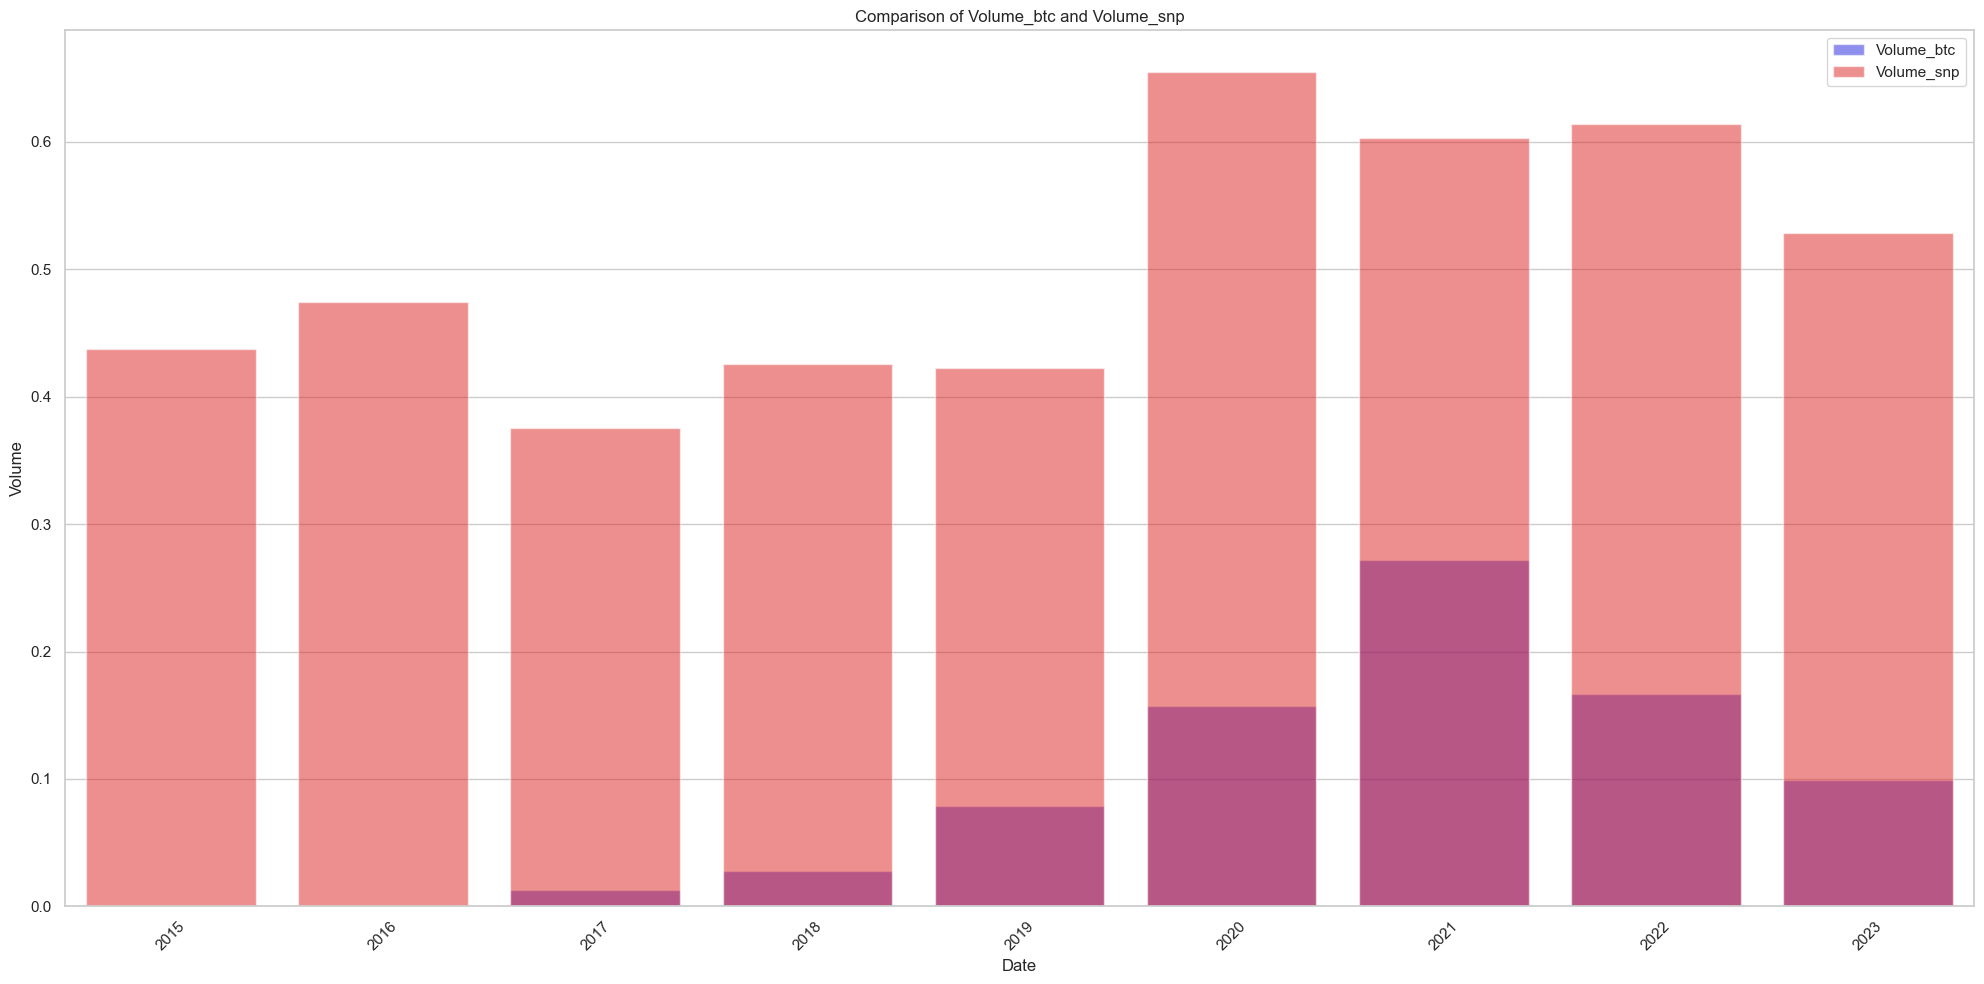

In [26]:
btc_month_df = btc_df.groupby(pd.Grouper(key='Date', freq='MS')).max().reset_index()
snp_month_df = snp_df.groupby(pd.Grouper(key='Date', freq='MS')).max().reset_index()
merge_month_df = pd.merge(btc_month_df, snp_month_df, on='Date', suffixes=('_btc', '_snp'))
merge_month_df['Year'] = merge_month_df['Date'].dt.year
yearly_avg_df = merge_month_df.groupby('Year').mean().reset_index()

plt.figure(figsize=(20, 10))

sns.barplot(data=yearly_avg_df, x='Year', y='Volume_btc', color='blue', alpha=0.5, label='Volume_btc')
sns.barplot(data=yearly_avg_df, x='Year', y='Volume_snp', color='red', alpha=0.5, label='Volume_snp')

plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Comparison of Volume_btc and Volume_snp')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 📌 분석 결과
- 2020년 투자 심리가 좋지 못했던 것에 반해 거래량은 급등하면서 자금이 주식과 가상자산에 유입 되었다.
- 많은 자금이 유입되면서 S&P500과 비트코인의 가격이 급등하는 결과가 나왔다.
- 2020년 거래량이 급등한 S&P500은 2021년도 부터는 거래량이 더 이상 증가하지 않는걸 보여준다.
- 비트코인은 2021년까지 꾸준히 거래량이 증가하며 2021년 고점을 달성한뒤 2023년까지 점차 감소함을 알수 있다.

#### ❓ 의문점
- 가상자산은 주식과 매우 유사하다. 하지만 S&P500은 최고가를 갱신한 2020년 큰 거래량을 보여줬지만 비트코인은 거래량이 서서히 증가한다. 2021년 비트코인도 최고가를 갱신했는데 S&P500처럼 거래량이 급등했어야하는 것이 아닌가?
- 가상자산에서 비트코인의 입지가 줄어들었는가?
- 비트코인뿐만 아니라 가상자산 전체에 대한 비트코인 도미넌스를 확인해보자

### 7. 비트코인 도미넌스 데이터를 활용해 가상자산에서 각 코인들의 비중 변화 데이터 시각화
- 비트코인을 제외한 가상자산 전체의 코인의 비중 증감을 시각화한다.
- 2020년과 2022년의 비트코인 도미넌스를 확인해 급등전과 후 비트코인 도니넌스를 비교하는 시각화

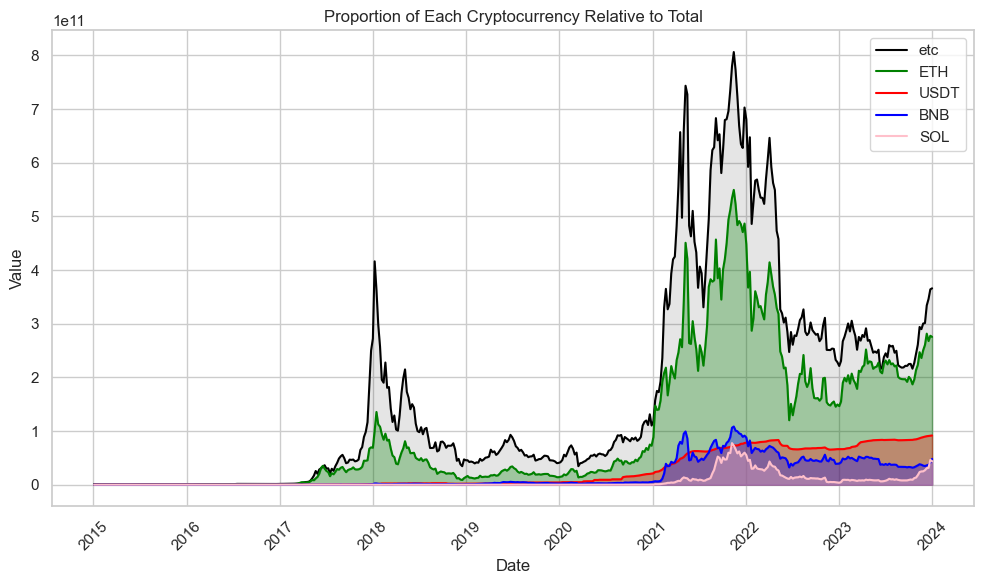

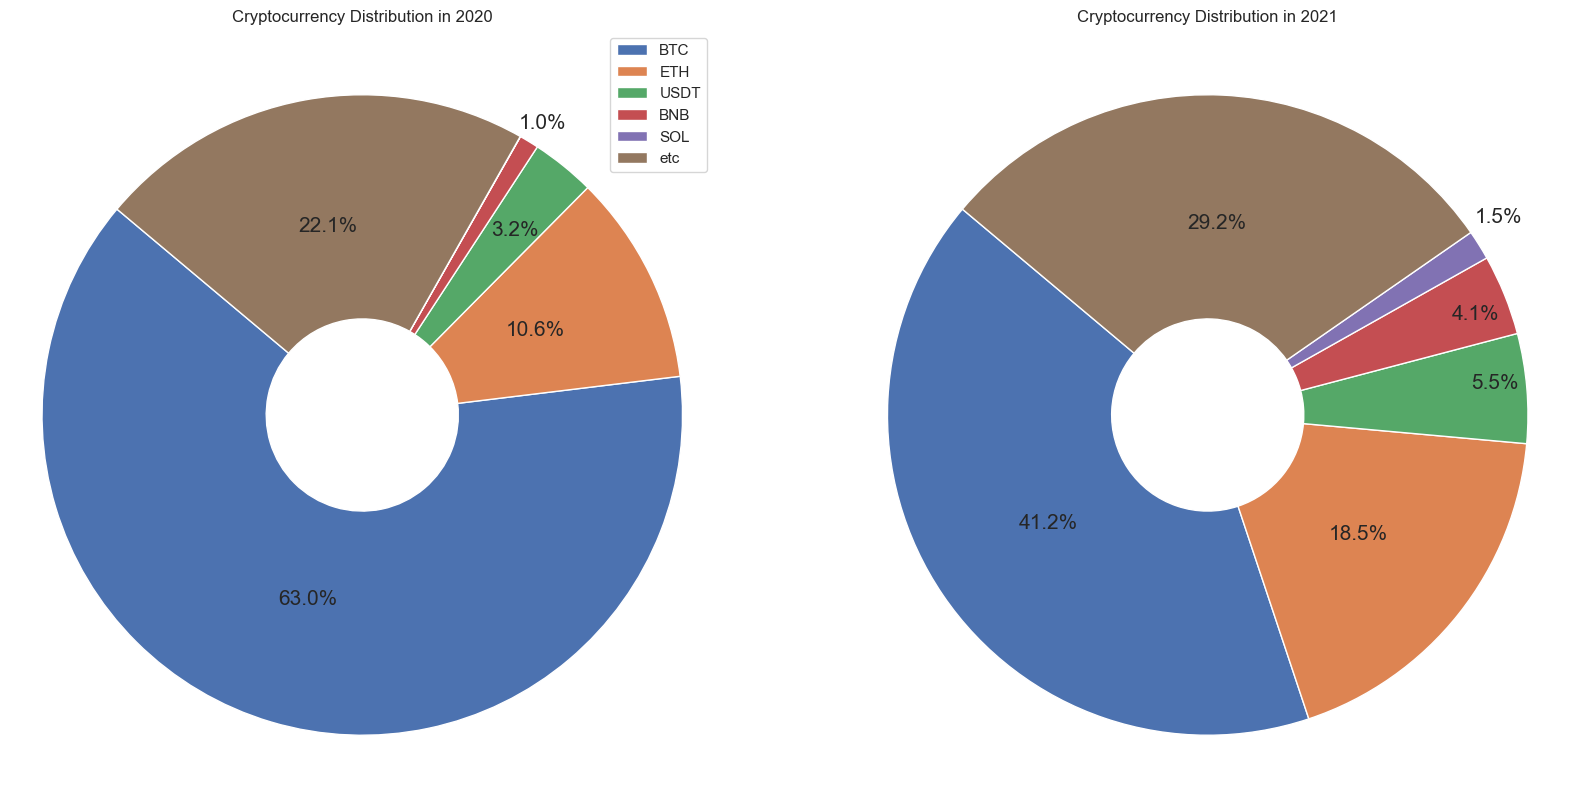

In [27]:
dominance_df['Date'] = pd.to_datetime(dominance_df['Date'])

# 열 이름 설정
columns = ['ETH','USDT','BNB','SOL','etc']

# 시각화
dominance_percentage_df = dominance_df.drop(columns='Date')

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(dominance_df['Date'], dominance_df['etc'], label='etc', color='black')
plt.fill_between(dominance_df['Date'], 0, dominance_df['etc'], color='black', alpha=0.1)
plt.plot(dominance_df['Date'], dominance_df['ETH'], label='ETH', color='green')
plt.fill_between(dominance_df['Date'], 0, dominance_df['ETH'], color='green', alpha=0.3)
plt.plot(dominance_df['Date'], dominance_df['USDT'], label='USDT', color='red')
plt.fill_between(dominance_df['Date'], 0, dominance_df['USDT'], color='red', alpha=0.3)
plt.plot(dominance_df['Date'], dominance_df['BNB'], label='BNB', color='blue')
plt.fill_between(dominance_df['Date'], 0, dominance_df['BNB'], color='blue', alpha=0.3)
plt.plot(dominance_df['Date'], dominance_df['SOL'], label='SOL', color='pink')
plt.fill_between(dominance_df['Date'], 0, dominance_df['SOL'], color='pink', alpha=0.3)

plt.title('Proportion of Each Cryptocurrency Relative to Total')
plt.xlabel('Date')
plt.legend()
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

dominance_df_2020 = dominance_df[dominance_df['Date'].dt.year == 2020]
dominance_df_2022 = dominance_df[dominance_df['Date'].dt.year == 2022]


dominance_df_2020 = dominance_df_2020.mean().reset_index()
dominance_df_2020.columns = ['name', 'value']
dominance_df_2020 = dominance_df_2020.drop(0).reset_index()
dominance_df_2020 = dominance_df_2020.drop(columns='index', axis=1)

dominance_df_2022 = dominance_df_2022.mean().reset_index()
dominance_df_2022.columns = ['name', 'value']
dominance_df_2022 = dominance_df_2022.drop(0).reset_index()
dominance_df_2022 = dominance_df_2022.drop(columns='index', axis=1)

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1) 
labels = dominance_df_2020['name']
sizes = dominance_df_2020['value']
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 1}
plt.rcParams['font.size'] = 15
_, _, autotexts_2020 = plt.pie(sizes, autopct='%1.1f%%', startangle=140, wedgeprops=wedgeprops)
for i, (label, size) in enumerate(zip(labels, sizes)):
    x, y = autotexts_2020[i].get_position() 
    if i == 2:
        autotexts_2020[i].set_position((x+0.1, y+0.11))
    if i == 3:
        autotexts_2020[i].set_position((x+0.25, y+0.4))
    if i == 4:
        autotexts_2020[i].set_visible(False)
plt.title('Cryptocurrency Distribution in 2020')
plt.legend(dominance_df_2020['name'])
plt.axis('equal')

plt.subplot(1, 2, 2)  
labels = dominance_df_2022['name']
sizes = dominance_df_2022['value']
plt.rcParams['font.size'] = 15
_, _, autotexts_2022 = plt.pie(sizes, autopct='%1.1f%%', startangle=140, wedgeprops=wedgeprops)
for i, (label, size) in enumerate(zip(labels, sizes)):
    x, y = autotexts_2022[i].get_position() 
    if i == 2:
        autotexts_2022[i].set_position((x+0.3, y+0.05))
    if i == 3:
        autotexts_2022[i].set_position((x+0.28, y+0.09))
    if i == 4:
        autotexts_2022[i].set_position((x+0.4, y+0.3))
plt.title('Cryptocurrency Distribution in 2021')
plt.axis('equal')
plt.show()

##### 비트코인 도미넌스란? : 전체 코인시장에서 비트코인 대비 다른 코인들의 비중을 알아볼수 있는 데이터이다.

#### 📌 분석 결과
- 가상자산중 비트코인이 큰 비중을 차지하는 것은 사실이지만 2020년 이후로 많이 감소하였고 다른 가상자산의 비중이 50%를 넘어섯다.
- 비트코인의 가격이 급등한 2021년도에 비트코인 외의 코인들의 비중이 비트코인 대비 크게 증가했다.
- 비트코인의 가격이 역사적 신고가를 연달아 달성했는데도 불구하고 그와 코인들의 비중이 더 높아졌다는건 비트코인보다 많은 더 많은 자금이 비트코인 외 코인들에 몰렸다는 것을 알수 있다.


#### 실제로 자료를 찾아본 결과 2021년에 비트코인 관련 기사들이 쏟아져 나왔다. (사진 첨부하기)

<div style='width:100%; display:flex; flex-wrap:nowrap; gap:1rem;'>
    <img src='./images/bitcoin1.png' style='width:50%'>
    <img src='./images/bitcoin2.png'  style='width:50%'>  
</div>
<div style='width:100%; display:flex; flex-wrap:nowrap; gap:1rem;'>
    <img src='./images/bitcoin3.png'  style='width:50%'>
    <img src='./images/bitcoin4.png'  style='width:50%'>
</div>

### ❓ 가장 큰 특이점을 보인 2020년에는 무슨일이 있었을까
#### 2020년 코로나 팬데믹 
- 전 세계 거의 모든 국가와 지역에서 확진자가 발생하며, 감염자 수는 기하급수적으로 늘어난다.
- 이로인해 거리두기, 봉새 조치가 시행 되었다.
- 학교, 회사, 공공 시설의 휴업과 모임 취소등이 이루어 졌다.
- 이로인해 많은 산업과 사업이 중단되고, 실업률이 상승했으며 금융시장에는 대폭적이 변동이 있었다.

<div style='width:100%; display:flex;'>
    <img src='./images/news1.png' style='width:50%'>
    <img src='./images/news2.png'  style='width:50%'>  
</div>
<div style='width:100%; display:flex;'>
    <img src='./images/news3.png'  style='width:50%'>
    <img src='./images/news4.png'  style='width:50%'>
</div>

In [28]:
region_data_df = covid_df.groupby('Continent').agg({
    'Population': 'sum',
    'TotalCases': 'sum',
    'TotalDeaths': 'sum'
}).reset_index()
region_data_df['CasesRatio'] = (region_data_df['TotalCases'] / region_data_df['Population'])
region_data_df['DeathsRatio'] = (region_data_df['TotalDeaths'] / region_data_df['Population'])
region_data_df['CasesDeathsRatio'] = (region_data_df['TotalDeaths'] / region_data_df['TotalCases'])

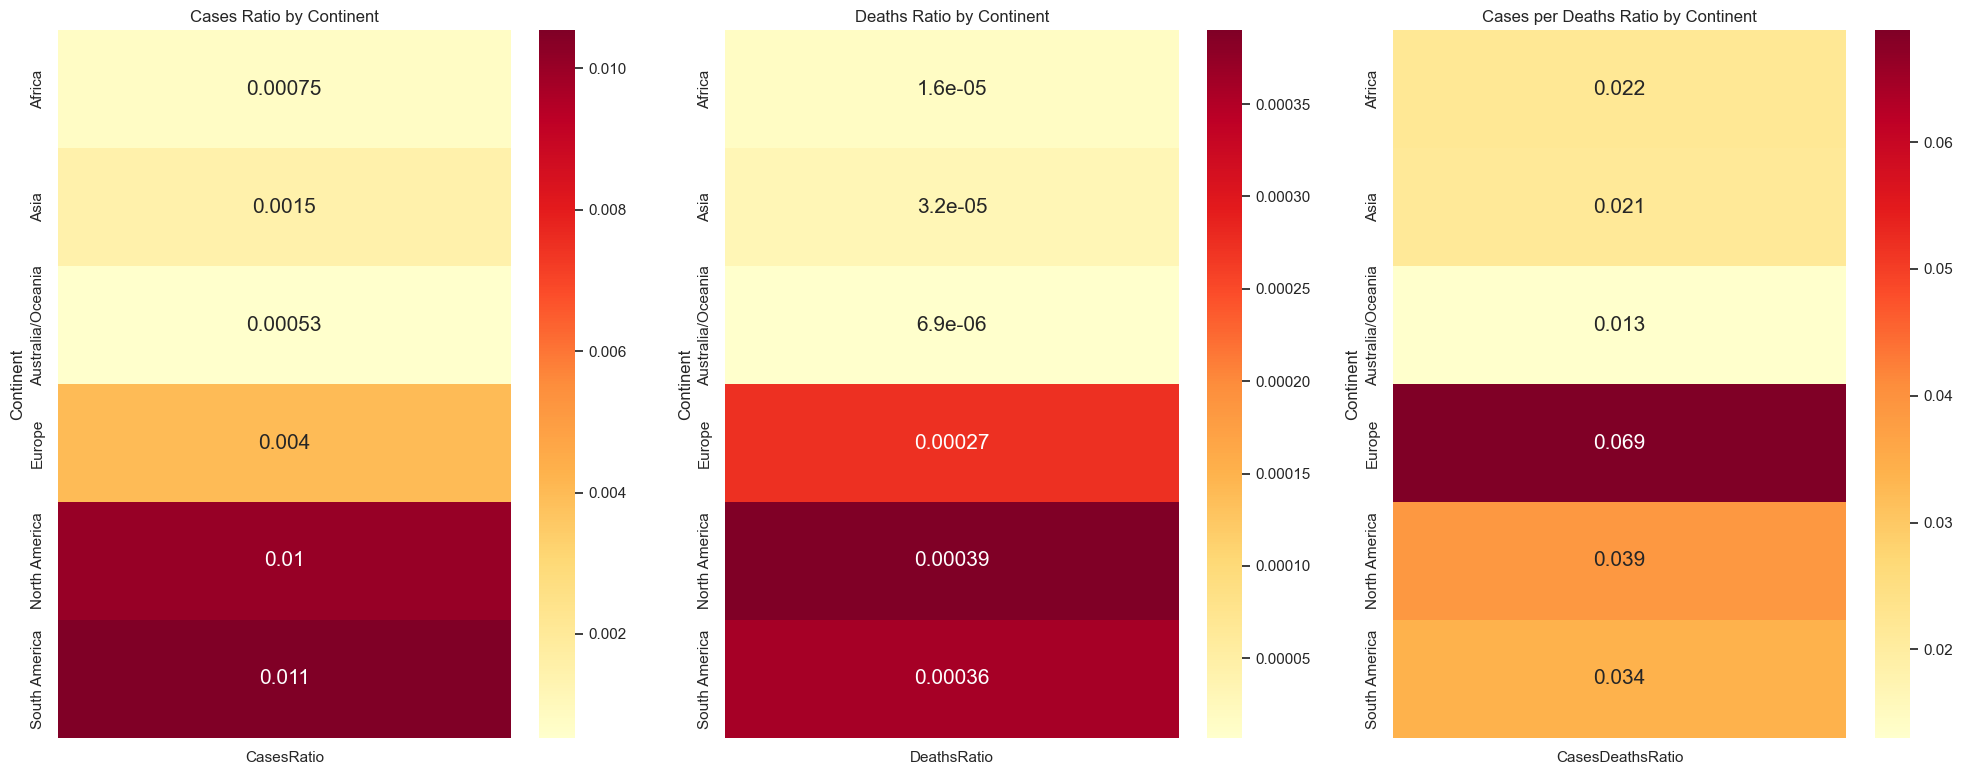

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(20, 8))

pivot_cases_ratio = region_data_df.pivot_table(index='Continent', values='CasesRatio', aggfunc='mean')
sns.heatmap(pivot_cases_ratio, annot=True, cmap='YlOrRd', ax=axes[0])
axes[0].set_title('Cases Ratio by Continent')

pivot_deaths_ratio = region_data_df.pivot_table(index='Continent', values='DeathsRatio', aggfunc='mean')
sns.heatmap(pivot_deaths_ratio, annot=True, cmap='YlOrRd', ax=axes[1])
axes[1].set_title('Deaths Ratio by Continent')

pivot_cases_deaths_ratio = region_data_df.pivot_table(index='Continent', values='CasesDeathsRatio', aggfunc='mean')
sns.heatmap(pivot_cases_deaths_ratio, annot=True, cmap='YlOrRd', ax=axes[2])
axes[2].set_title('Cases per Deaths Ratio by Continent')

plt.tight_layout()
plt.show()

#### 📌 분석 결과
- 모든 대륙에서 확진자와 확진 후 사망자까지 존재함으로 전세계적으로 코로나가 유행했음을 알수 있다.
- 아메리카, 유럽 대륙이 큰 타격을 입었을 것으로 예측된다.
- 선진국들이 타격을 크게 입었으므로 경제가 좋지 않았음을 예측 할수 있다.

### 📝 데이터 분석 결과 보고서
 
### ✔ 요약

#### 1️⃣ 금리와의 연관
- 비트코인의 큰 하락전에는 금리가 큰폭으로 하락하였다. 금리가 큰폭으로 하락이유는 세계경제 이벤트 때문인것으로 나타났다.

#### 2️⃣ 경제적 타격
- 코로나 19 대유행으로 세계경제가 무너지면서 금리가 상승하고 S&P500과 비트코인이 큰폭으로 하락했다
- 2020년에는 코로나19 대유행의 영향으로 비트코인이 큰폭으로 하락하였다.

#### 3️⃣ 물가 변동
- 대규모 하락 시기에는 물가도 일시적으로 하락하였다. 하락후에는 물가가 더 가파르게 상승했고 비트코인도 급등하였다.

#### 4️⃣ 투자심리와 거래량
- VIX 지수 분석 결과, 2020년에는 투자 심리가 심각하게 위축되었지만 거래량은 급증하여 비트코인에 자금이 몰렸다, 2021년에는 비트코인의 가격이 상승했음에도 여전히 보수적인 투자자들이 많았습니다.

### 🔴 결론
- 비트코인의 가격은 물가와 금리와 연관성이 있는 것으로 확인 되었다. 경제 이벤트가 발생하여 금리가 하락하면 물가와 비트코인의 가격이 하락했고 금리가 상승하면 물가의 상승이 가팔라지며 비트코인의 가격이 함께 상승했다. 하지만 투자심리와는 연관성이 없다고 판단했다. 비트코인의 가격이 최고점이었던 2021년도에 투자 심리는 보수적이었지만 자금 유입량은 많았다. 투자심리와 비트코인은 디커플링되는 모습을 보여주었다.